# Pre-processing examples on modcloth dataset

### Attribution: Soujanya G, Kaggle

The notebook was released under the [Apache 2.0](http://www.apache.org/licenses/LICENSE-2.0) open source license.

# **About the dataset**

In this notebook, we will use modcloth_final_data.json as input dataset

In [2]:
# import necessary libraries

# File read and EDA(Data Cleansing & Transformations)
import numpy as np  
import pandas as pd 

# EDA Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Mounting gDrive

In [ ]:
#Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"

In [ ]:
#Change directory to my folder for analytics labs where I have cloned my gitHub repositories with magic command.

%cd drive/My Drive/Data_analytics_lab

# Read input json data

In [3]:
#Read file and view first ten rows
mc_data= pd.read_json("data_code_along/modcloth_final_data.json", lines=True)
mc_data.head() # displays first 5 records in the dataframe

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


## EDA - Exploratory Data Analysis

# Column names are inconsistent
Some of the column names are having space and rest of them are having underscore in between them. Hence try to be consistent by adding underscore instead of space

> for your information, size is the keyword in pandas , make sure to change the feature name "size" to some user defined name like "mc_size"
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.size.html

In [3]:
mc_data.columns = ['item_id', 'waist', 'mc_size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_test']

> see the total number of observations, column names and datatypes info 

In [4]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
item_id           82790 non-null int64
waist             2882 non-null float64
mc_size           82790 non-null int64
quality           82722 non-null float64
cup_size          76535 non-null object
hips              56064 non-null float64
bra_size          76772 non-null float64
category          82790 non-null object
bust              11854 non-null object
height            81683 non-null object
user_name         82790 non-null object
length            82755 non-null object
fit               82790 non-null object
user_id           82790 non-null int64
shoe_size         27915 non-null float64
shoe_width        18607 non-null object
review_summary    76065 non-null object
review_test       76065 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 11.4+ MB


# Sparse Data

Given data is having lot of missing values , for example look at the columns such as shoe_size and show_width.

> lets check the missing values percentage for each feature

In [5]:
missing_data_sum = mc_data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/mc_data.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
item_id,0,0.000000
waist,79908,96.518903
mc_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


*Out of 18 columns, only 6 columns have complete data. And columns such as waist , bust, shoe_size, show_width and hips are highly sparse*

> Check Data types which are having numerical/categorical data

In [6]:
mc_data.dtypes

item_id             int64
waist             float64
mc_size             int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe_size         float64
shoe_width         object
review_summary     object
review_test        object
dtype: object

*pandas library identifies item_id, waist, mc_size, quality, hips, bra_size, user_id, shoe_size are numeric And cup_size, category, bust, height, user_name, length, fit, shoe_width, review_summary , review_test are object type . Take away from this is "There are some numeric data columns are fall under Object types" . Hence we need to handle the misclassification of these data types. For example, bust data contains numeric values but its dtype is Object.*

# Unique number of observations for each feature

> If the dataset is having less number of observations then we can see the unique data that resides in each feature(There are 82790 observations)

In [7]:
mc_data.nunique()

item_id            1378
waist                31
mc_size              29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe_size            15
shoe_width            3
review_summary    61713
review_test       73313
dtype: int64

*With this, we can clearly understand there is no unique data entirely for one feature to make the index if any.
And just to make a note the columns item_id and user_id are repeating.*

> Lets look into unique observations which are having less uniqueness

In [ ]:
def countplot(indipendent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

In [ ]:
uniques_data = ['quality', 'cup_size', 'bra_size', 'category', 'length', 'fit',  'shoe_size', 'shoe_width', 'height', 'bust', 'mc_size']
countplot(uniques_data)

*Few observations*
* cup_size contains some format which might represents the measurement
* shoe_size 38 is an outlier , there we can see lot of variance 
* height column also having few outliers (May be we can see those things after converting categorical data into numeric values)
* there are categorical data exists such as shoe_width, category, length, fit and height. 
* For the feature bust - clearly there is one observation with different data, hence we need to format it i.e "37 - 39". Will try to replace this value with mean


In [ ]:
# replacing bust unformatted value with mean 38 which is taken from the values 37 & 39 
mc_data.at[mc_data[mc_data.bust == '37-39'].index[0],'bust'] = '38'

# Height feature - Convert US units to Metric units (ft & in to cm).

In [8]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

mc_data.height = mc_data.height.astype(str).apply(height_in_cms)
mc_data.head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.2,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.5,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


> we successfully converted metrics to centimetres. Now lets handle the missing values with mean imputation and then look into the outliers for this height feature. Use box/scatter plot for outliers visualization

In [9]:
mc_data.height.fillna(value=mc_data.height.mean(), inplace=True)
mc_data.height.isnull().sum()

0

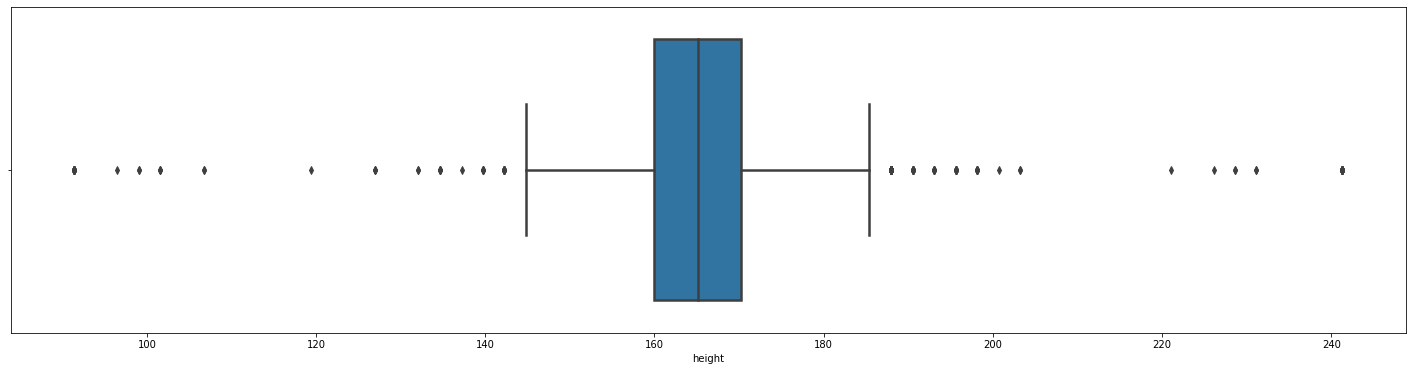

In [10]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)
plot_outlier(mc_data.height)

> Check the lower and upper cutoff range values for the outliers

In [11]:
def get_outliers_range(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [12]:

ht_lower_range,ht_upper_range = get_outliers_range(mc_data.height)
ht_lower_range,ht_upper_range

(144.70000000000002, 185.49999999999997)

> Take away "there are so many outliers" exists. Here I have used Inter Quartile Range calculation to find the lower range and upper range cutoff. 
So the outlier would be anything less than the lower range cutoff(144.7) or anything more than the upper range cutoff(185.5) is an outlier.  \

Note: there are different techniques to identify the outliers 
Please check out this link for more details on this
https://statisticsbyjim.com/basics/outliers/


> Lets count how many outliers exists for this height feature


In [13]:
mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)]

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
468,125442,NaN,5,5.0,c,35.0,34.0,new,NaN,101.6,sarah.d.charleton,just right,fit,536627,NaN,NaN,NaN,NaN
1895,129268,NaN,20,3.0,NaN,NaN,NaN,new,NaN,190.5,fran4252,slightly short,small,768980,NaN,NaN,NaN,NaN
1952,129268,NaN,26,5.0,d,49.0,40.0,new,45,188.0,folkloregray,slightly long,fit,463032,10.5,average,NaN,NaN
2919,136482,NaN,32,4.0,ddd/f,46.0,40.0,new,NaN,188.0,krobinson2011,just right,fit,372482,NaN,NaN,NaN,NaN
3223,137865,NaN,26,4.0,h,47.0,36.0,new,NaN,188.0,Leila,just right,fit,527524,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80344,792842,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,I need blazers to wear ov,I need blazers to wear over some of my dresses...
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
81083,803464,NaN,4,5.0,NaN,NaN,NaN,outerwear,NaN,241.3,Ida,just right,fit,887787,NaN,NaN,Finally a blazer that fit,Finally a blazer that fits me perfectly and do...
81846,806479,NaN,15,5.0,c,40.0,34.0,outerwear,NaN,188.0,brittanna75,slightly long,large,910471,9.5,average,I am very happy with this,I am very happy with this coat. It will be a ...


> Take Away "There are 199 outliers". which is 0.2% of total number observations. Hence we can remove/drop/delete these outliers

In [14]:
mc_df = mc_data.drop(mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)].index)

mc_df.reset_index(drop=True, inplace=True)
mc_df.shape

(82591, 18)

> Lets look again the height feature using box plot to see the handling of outlier 

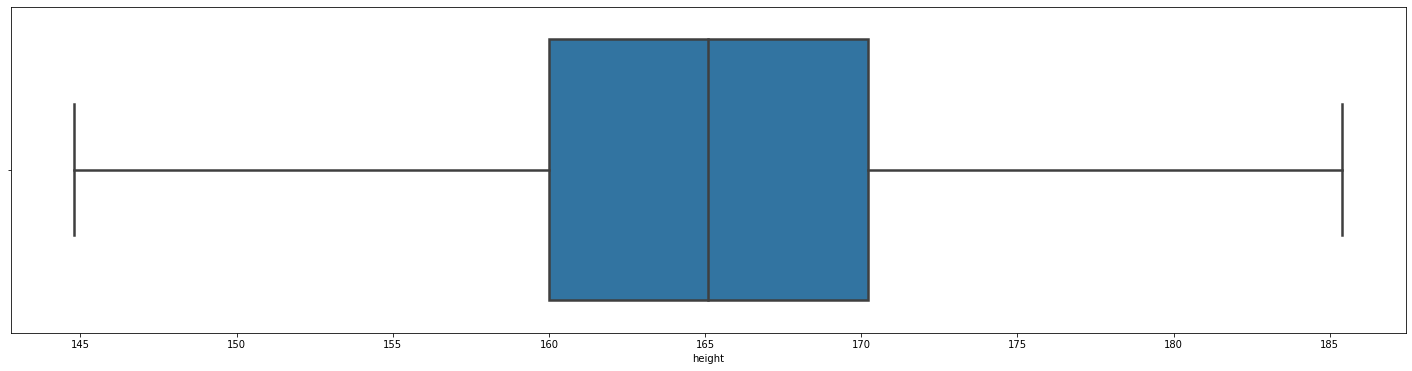

In [15]:
plot_outlier(mc_df.height)

# Numeric features distributions Visualization 

In [ ]:
def plot_dist(df, indipendent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None

In [ ]:
plot_dist(mc_data, ['height', 'waist', 'mc_size', 'quality', 'hips', 'bra_size', 'shoe_size'])

# Missing Values Handling for numeric features

> as we see there are lot of missing values in this dataset. Since the data is highly sparse, i am trying to use KNN algorith to impute the relavant features.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

# finding imputation using other features (it will take couple of minutes to complete the execution)
mc_data_knn_ind_features = mc_df[['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size']]

df_filled = imputer.fit_transform(mc_data_knn_ind_features)


knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'])


# remove the existing numeric columns (waist, height, hips, bra_size, bust, shoe_size ) from the main dataframe and concatenate  with knn imputed data
#mc_df = mc_data
mc_new_df = mc_df.drop(['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'], axis=1)




In [ ]:
# concat the imputations data with mc data frame
mc = pd.concat([mc_new_df, knn_numeric_imputations], axis=1)
mc.isnull().sum()

> we successfully done the imputations for some of the numeric features

# Handling shoe-size outliers

In [ ]:
plot_outlier(mc.shoe_size)

clearly, there are few outliers, using IQR cutoff range values remove there observations

In [ ]:
ss_lower_range,ss_upper_range = get_outliers_range(mc.shoe_size)
#print(ss_lower_range,ss_upper_range)

mc.drop(mc[(mc.shoe_size < ss_lower_range) | (mc.shoe_size > ss_upper_range)].index, axis=0, inplace=True) # found 390 observations 
plot_outlier(mc.shoe_size)

# Transform some of categorical variables to numeric 

### feature : Cup size - used open source data to convert measurements into numerical data

![image.png](attachment:image.png)
source taken from https://www.blitzresults.com/en/bra-size/

Adding two new columns for the feture "cup_size" in order to convert the measurements into centimeters and then imputing missing values with mean values. 

In [ ]:
def convert_cup_size_to_cms(cup_size_code):
  if cup_size_code == 'aa':
    return 10, 11
  if cup_size_code == 'a':
    return 12, 13
  if cup_size_code == 'b':
    return 14, 15
  if cup_size_code == 'c':
    return 16, 17
  if cup_size_code == 'd':
    return 18, 19
  if cup_size_code == 'dd/e':
    return 20, 21
  if cup_size_code == 'ddd/f':
    return 22, 23
  if cup_size_code == 'dddd/g':
    return 24, 25
  if cup_size_code == 'h':
    return 26, 27
  if cup_size_code == 'i':
    return 28, 29
  if cup_size_code == 'j':
    return 30, 31
  if cup_size_code == 'k':
    return 32, 33 
  else:
    return str('unknown')

In [ ]:
mc['cup_size_in_cms'] = mc.cup_size.apply(convert_cup_size_to_cms)
mc.head()

In [ ]:
def split_cup_size_data(data, index):
  if data.lower() == 'unknown':
    return 0
  value = data.replace('(','').replace(')','').replace(',','')
  return value.split()[index]

mc['cup_size_start_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 0))
mc['cup_size_end_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 1))
mc.head()

In [ ]:
mc['cup_size_start_in_cms'] = mc.cup_size_start_in_cms.astype('int')
mc['cup_size_end_in_cms'] = mc.cup_size_end_in_cms.astype('int')


# missing values imputation with mean
mc['cup_size_start_in_cms']  = mc.cup_size_start_in_cms.mask(mc.cup_size_start_in_cms==0).fillna(value=mc.cup_size_start_in_cms.mean())
mc['cup_size_end_in_cms']  = mc.cup_size_end_in_cms.mask(mc.cup_size_end_in_cms==0).fillna(value=mc.cup_size_end_in_cms.mean())

> lets double check the NaN values imputations for the newly added features

In [ ]:
mc[mc.cup_size.isnull()]

In [ ]:
# drop the columns which are used for reference
mc = mc.drop(['cup_size', 'cup_size_in_cms'], axis = 1)
mc.reset_index(drop=True,  inplace=True)

## Categorical data to Numeric using one-hot encoding

> lets try to see the visualization for categorical data against the dependent feature fit


In [ ]:
def countplot_wrt_target(indipendent_features, df):
  plt.figure(figsize=(28, 10))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(1, 3, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(x=df[feature], hue=df.fit)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None


In [ ]:
countplot_wrt_target(['category', 'length', 'quality'], mc)

# feature shoe_width : used open source data to identify shoe width based on shoe size

![image.png](attachment:image.png)

Reference link : https://images-na.ssl-images-amazon.com/images/I/71u90X9oX3S.pdf

In [ ]:
# fill NaN with average shoe width category (this is just an assumption)
mc.shoe_width = mc.shoe_width.fillna('average')

In [ ]:
# Use above chart to convert shoe width data such as 'wide','average','narrow' to inches
mc['shoe_width_in_inches'] = np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'narrow') , 2.81, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'average') , 3.19, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'wide') , 3.56,
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'narrow') , 2.87, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'average') , 3.25, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'wide') , 3.62, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'narrow') , 2.94, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'average') , 3.31, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'wide') , 3.69,
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'narrow') , 3, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'average') , 3.37, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'wide') , 3.75,
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'narrow') , 3.06, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'average') , 3.44, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'wide') , 3.81, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'narrow') , 3.12, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'average') , 3.5, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'wide') , 3.87, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'narrow') , 3.19, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'average') , 3.56, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'wide') , 3.94, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'narrow') , 3.25, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'average') , 3.62, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'wide') , 4, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'average') , 3.69, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'wide') , 4.06, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'wide') , 4.12, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'narrow') , 3.44, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'narrow') , 3.5, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'average') , 3.87, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'narrow') , 3.56, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'average') , 3.94, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'wide') , 4.19,
np.nan)))))))))))))))))))))))))))))))))))))))

In [ ]:
# drop the refrence colum shoe_width
mc.drop(['shoe_width'], axis=1, inplace=True)

# Applied one-hot encoding for the features length & category 

> when we dont find any ascending/descending order between the category values one way to overcome this problem is "by using one hot encoding".

> 


In [ ]:
# lets replace NaN values with unknown for the feature length
mc.length = mc.length.fillna('unknown')

In [ ]:
# apply one hot encoding using dummies

length_dummies  = pd.get_dummies(mc['length'])
length_dummies.columns = ['just_right','slightly_long','very_short','slightly_short','very_long', 'length_unkown']

category_dummies  = pd.get_dummies(mc['category'])
category_dummies.columns = ['new','dresses','wedding','sale','tops', 'bottoms','outerwear']

model_input_df = pd.concat([mc, length_dummies,category_dummies], axis = 1)
model_input_df.drop(['length'], axis=1, inplace=True)
model_input_df.drop(['category'], axis=1, inplace=True)

# target variable 
fit = {'small':0, 'fit':1, 'large':2}
model_input_df['fit'] = model_input_df['fit'].map(fit)


In [ ]:
# since there is no value add to the features like item_id , user_id and user_name

model_input_df.drop(['item_id'], axis=1, inplace=True)

model_input_df.drop(['user_id'], axis=1, inplace=True)

model_input_df.drop(['user_name'], axis=1, inplace=True)
model_input_df.head()